## Huggung face models

Testing some models for potential comparison to other models.

In [41]:
import open_clip
from metaspace import SMInstance
import pandas as pd
import numpy as np
import torch
from torchvision.transforms import Resize

from ionimage_embedding.dataloader.clr_data import CLRdata

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
open_clip.version.__version__

'2.22.0'

In [5]:
model, preprocess_train, preprocess_val = open_clip.create_model_and_transforms('hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224')
tokenizer = open_clip.get_tokenizer('hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224')

In [57]:
# Download some images:
ds_list = [
    '2022-12-07_02h13m50s',
    '2023-05-23_20h44m02s',
    '2023-09-29_10h49m52s',
    '2023-08-26_16h35m20s'
                  ]

clrdat = CLRdata(ds_list, test=0.3, val=0.1, cache=False, cache_folder='/scratch/model_testing')

100%|████████████████████████████████████████| 156/156 [00:00<00:00, 168.09it/s]


(1039, 470, 470)


In [58]:
pd.Series(clrdat.full_dataset.dataset_labels).value_counts()

1    352
3    306
0    245
2    136
Name: count, dtype: int64

In [59]:
device='cuda'
model.to(device)
model.eval()
print()

In [60]:
shp = clrdat.full_dataset.images.shape
images = torch.tensor(clrdat.full_dataset.images).reshape((shp[0], 1, shp[1], shp[2]))
images.shape
resizer = Resize((224, 224))
images = resizer(images)

# Model requires 3 channels per image
images = torch.cat([images] * 3, dim=1)
images.shape

/home/trose/.conda/envs/torch-gpuCUDA12/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([1039, 3, 224, 224])

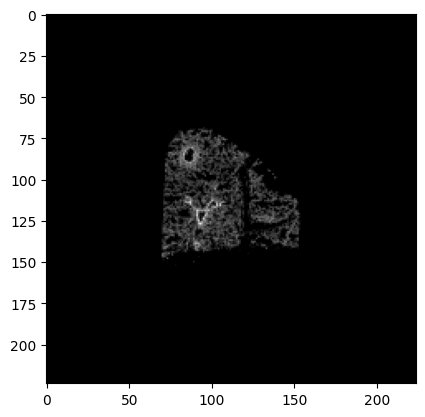

In [88]:
plt.imshow(np.array(images[350]).transpose(1, 2, 0))

In [83]:
sel = [15, 80, 100, 205, 300, 301, 350, 600, 603, 653, 644, 969, 970, 986, 988]
imgs = images[sel]
imgs = imgs.to(device)

In [84]:
image_features, text_features, logits = model(imgs)

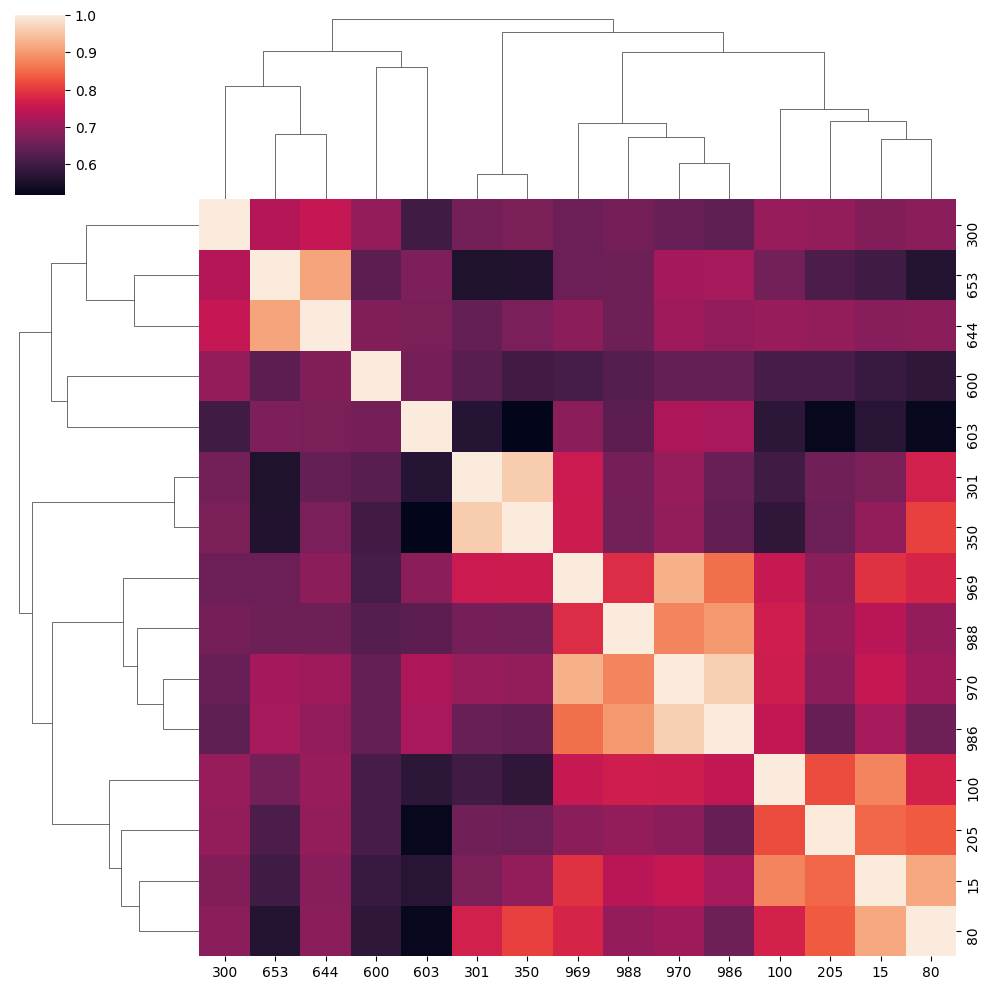

In [85]:
dat = pd.DataFrame((image_features @image_features.t()).cpu().detach().numpy(), columns=sel, index=sel)
sns.clustermap(dat)